# Air quality of Delhi Data Analysis

# Import the necessary libraries


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset and Explore It

In [2]:
df = pd.read_csv("delhi_aqi.csv")
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


# Understand Basic Info

In [3]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [4]:
df.shape

(18776, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [8]:
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

# EDA (Exploratory Data Analysis)

# Overall Pollution Trend Over Time


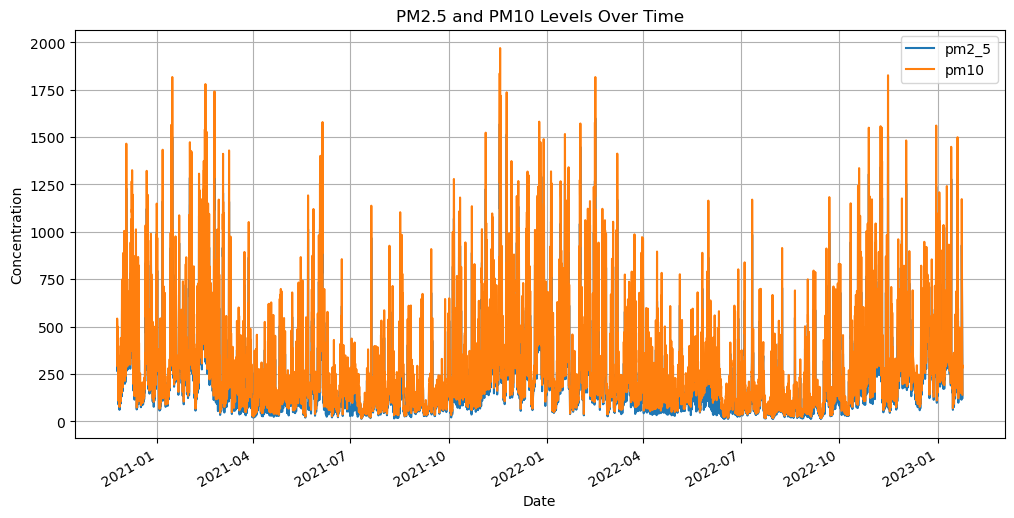

In [9]:
overall=df.set_index('date')[['pm2_5', 'pm10']].plot(figsize=(12,6))
plt.title('PM2.5 and PM10 Levels Over Time')
plt.ylabel('Concentration')
plt.xlabel('Date')
plt.grid(True)
plt.show()
# overall
# df

# Monthly Pollution Trend

In [10]:
df.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04


In [11]:
df['Month']=df['date'].dt.month
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Month
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,11
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,11
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,11
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,11
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,11
...,...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,1
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,1
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,1
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,1


In [12]:
monthly_pm25 = df.groupby('Month')[['pm2_5', 'pm10']].mean()
monthly_pm25

,pm2_5,pm10
Month,,
1,344.322954,400.478436
2,420.916735,500.445977
3,214.134583,280.743730
4,123.566424,176.764278
5,158.434738,227.047177
6,134.011785,208.986806
7,105.585688,146.123889
8,112.240921,156.232890
9,134.358264,172.658694


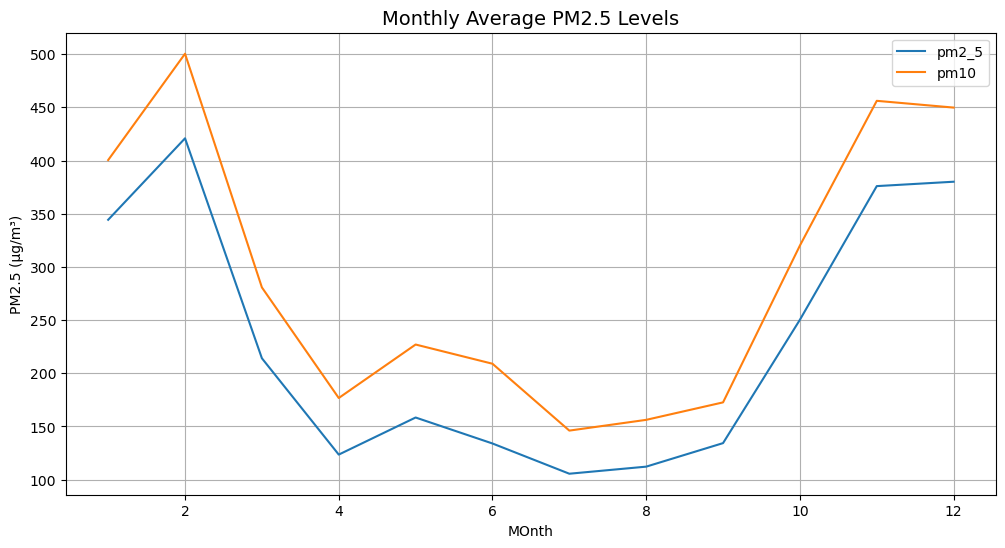

In [13]:
monthly_pm25.plot(figsize=(12,6))
plt.title('Monthly Average PM2.5 Levels',fontsize=14)
plt.xlabel('MOnth')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

# Top 5 Most Polluted Days (by PM2.5)

In [14]:
df.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Month
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,11
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,11


In [15]:
top_pm2_5 = df.sort_values(by='pm2_5',ascending=False).head(5)
print(top_pm2_5[['date','pm2_5']])

                     date    pm2_5
8570  2021-11-18 03:00:00  1708.09
8569  2021-11-18 02:00:00  1627.52
10682 2022-02-15 03:00:00  1599.59
8561  2021-11-17 18:00:00  1568.93
8560  2021-11-17 17:00:00  1567.40


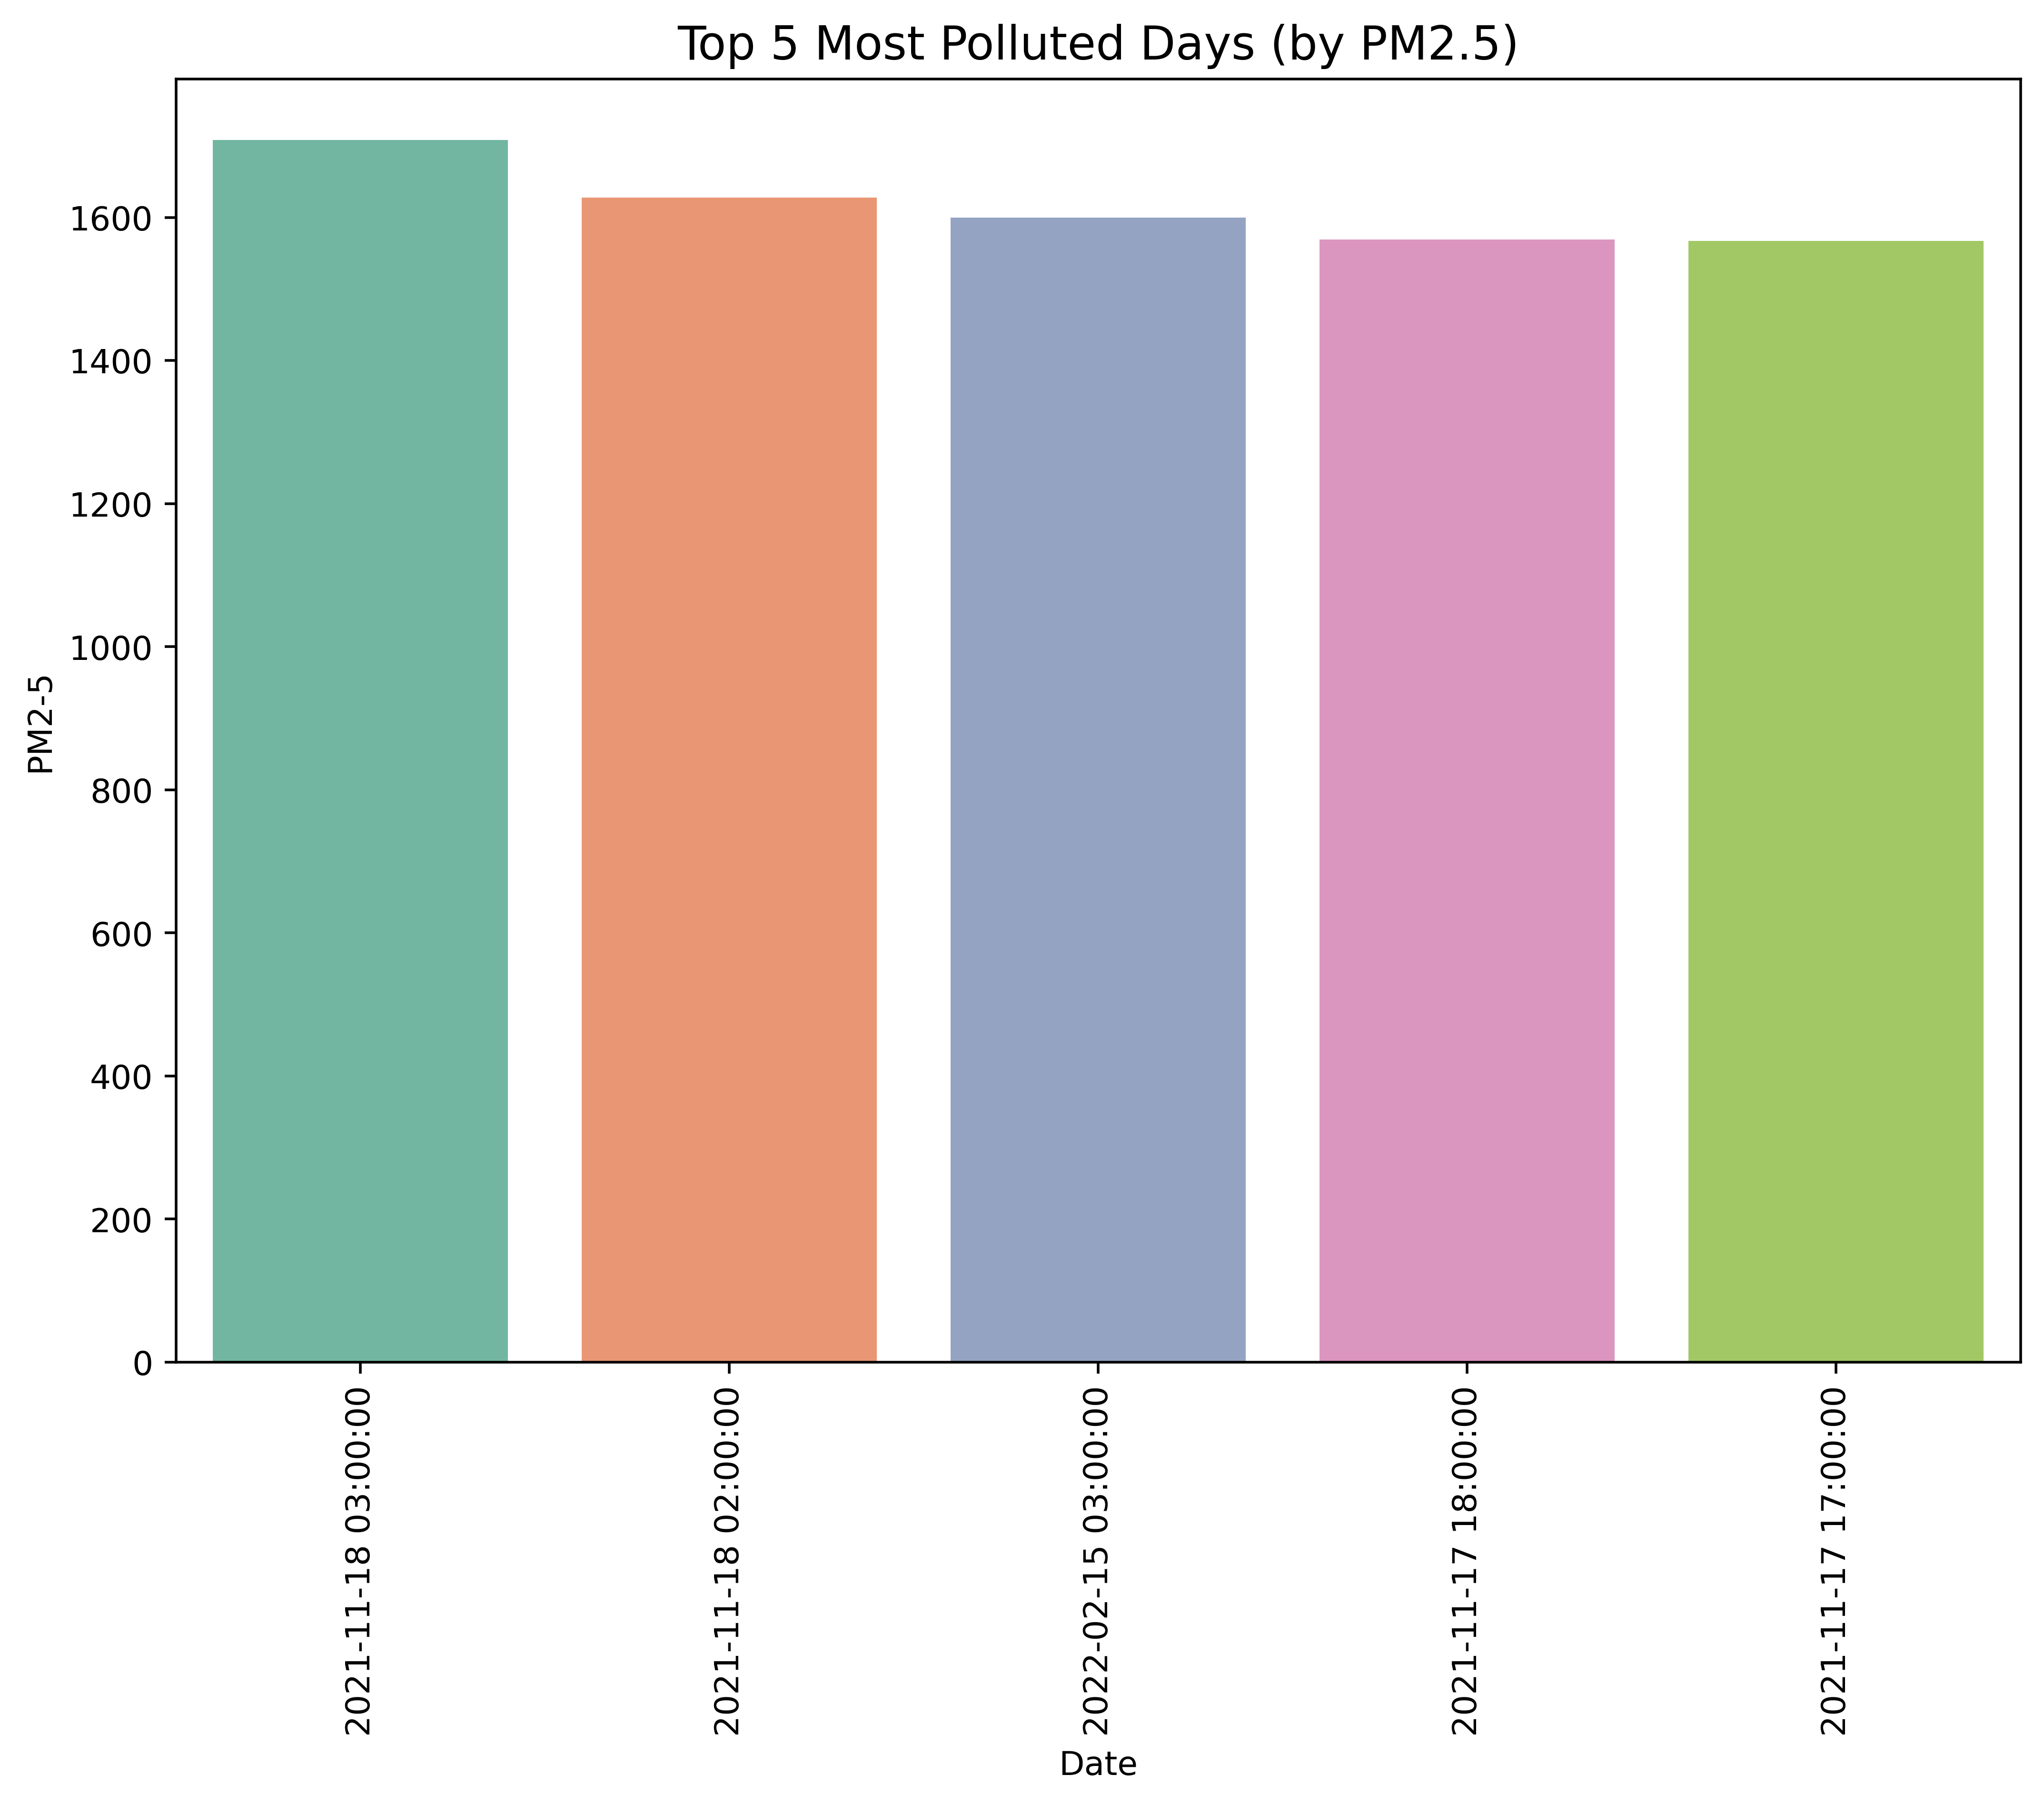

In [16]:
plt.figure(figsize=(10,7),dpi=500)

sns.barplot(x='date',y='pm2_5',data=top_pm2_5,palette='Set2')
plt.title('Top 5 Most Polluted Days (by PM2.5)',fontsize=14)
plt.xlabel('Date')
plt.ylabel('PM2-5')
plt.xticks(rotation=90)
plt.show()

# PM2.5 vs PM10 Scatter Plot

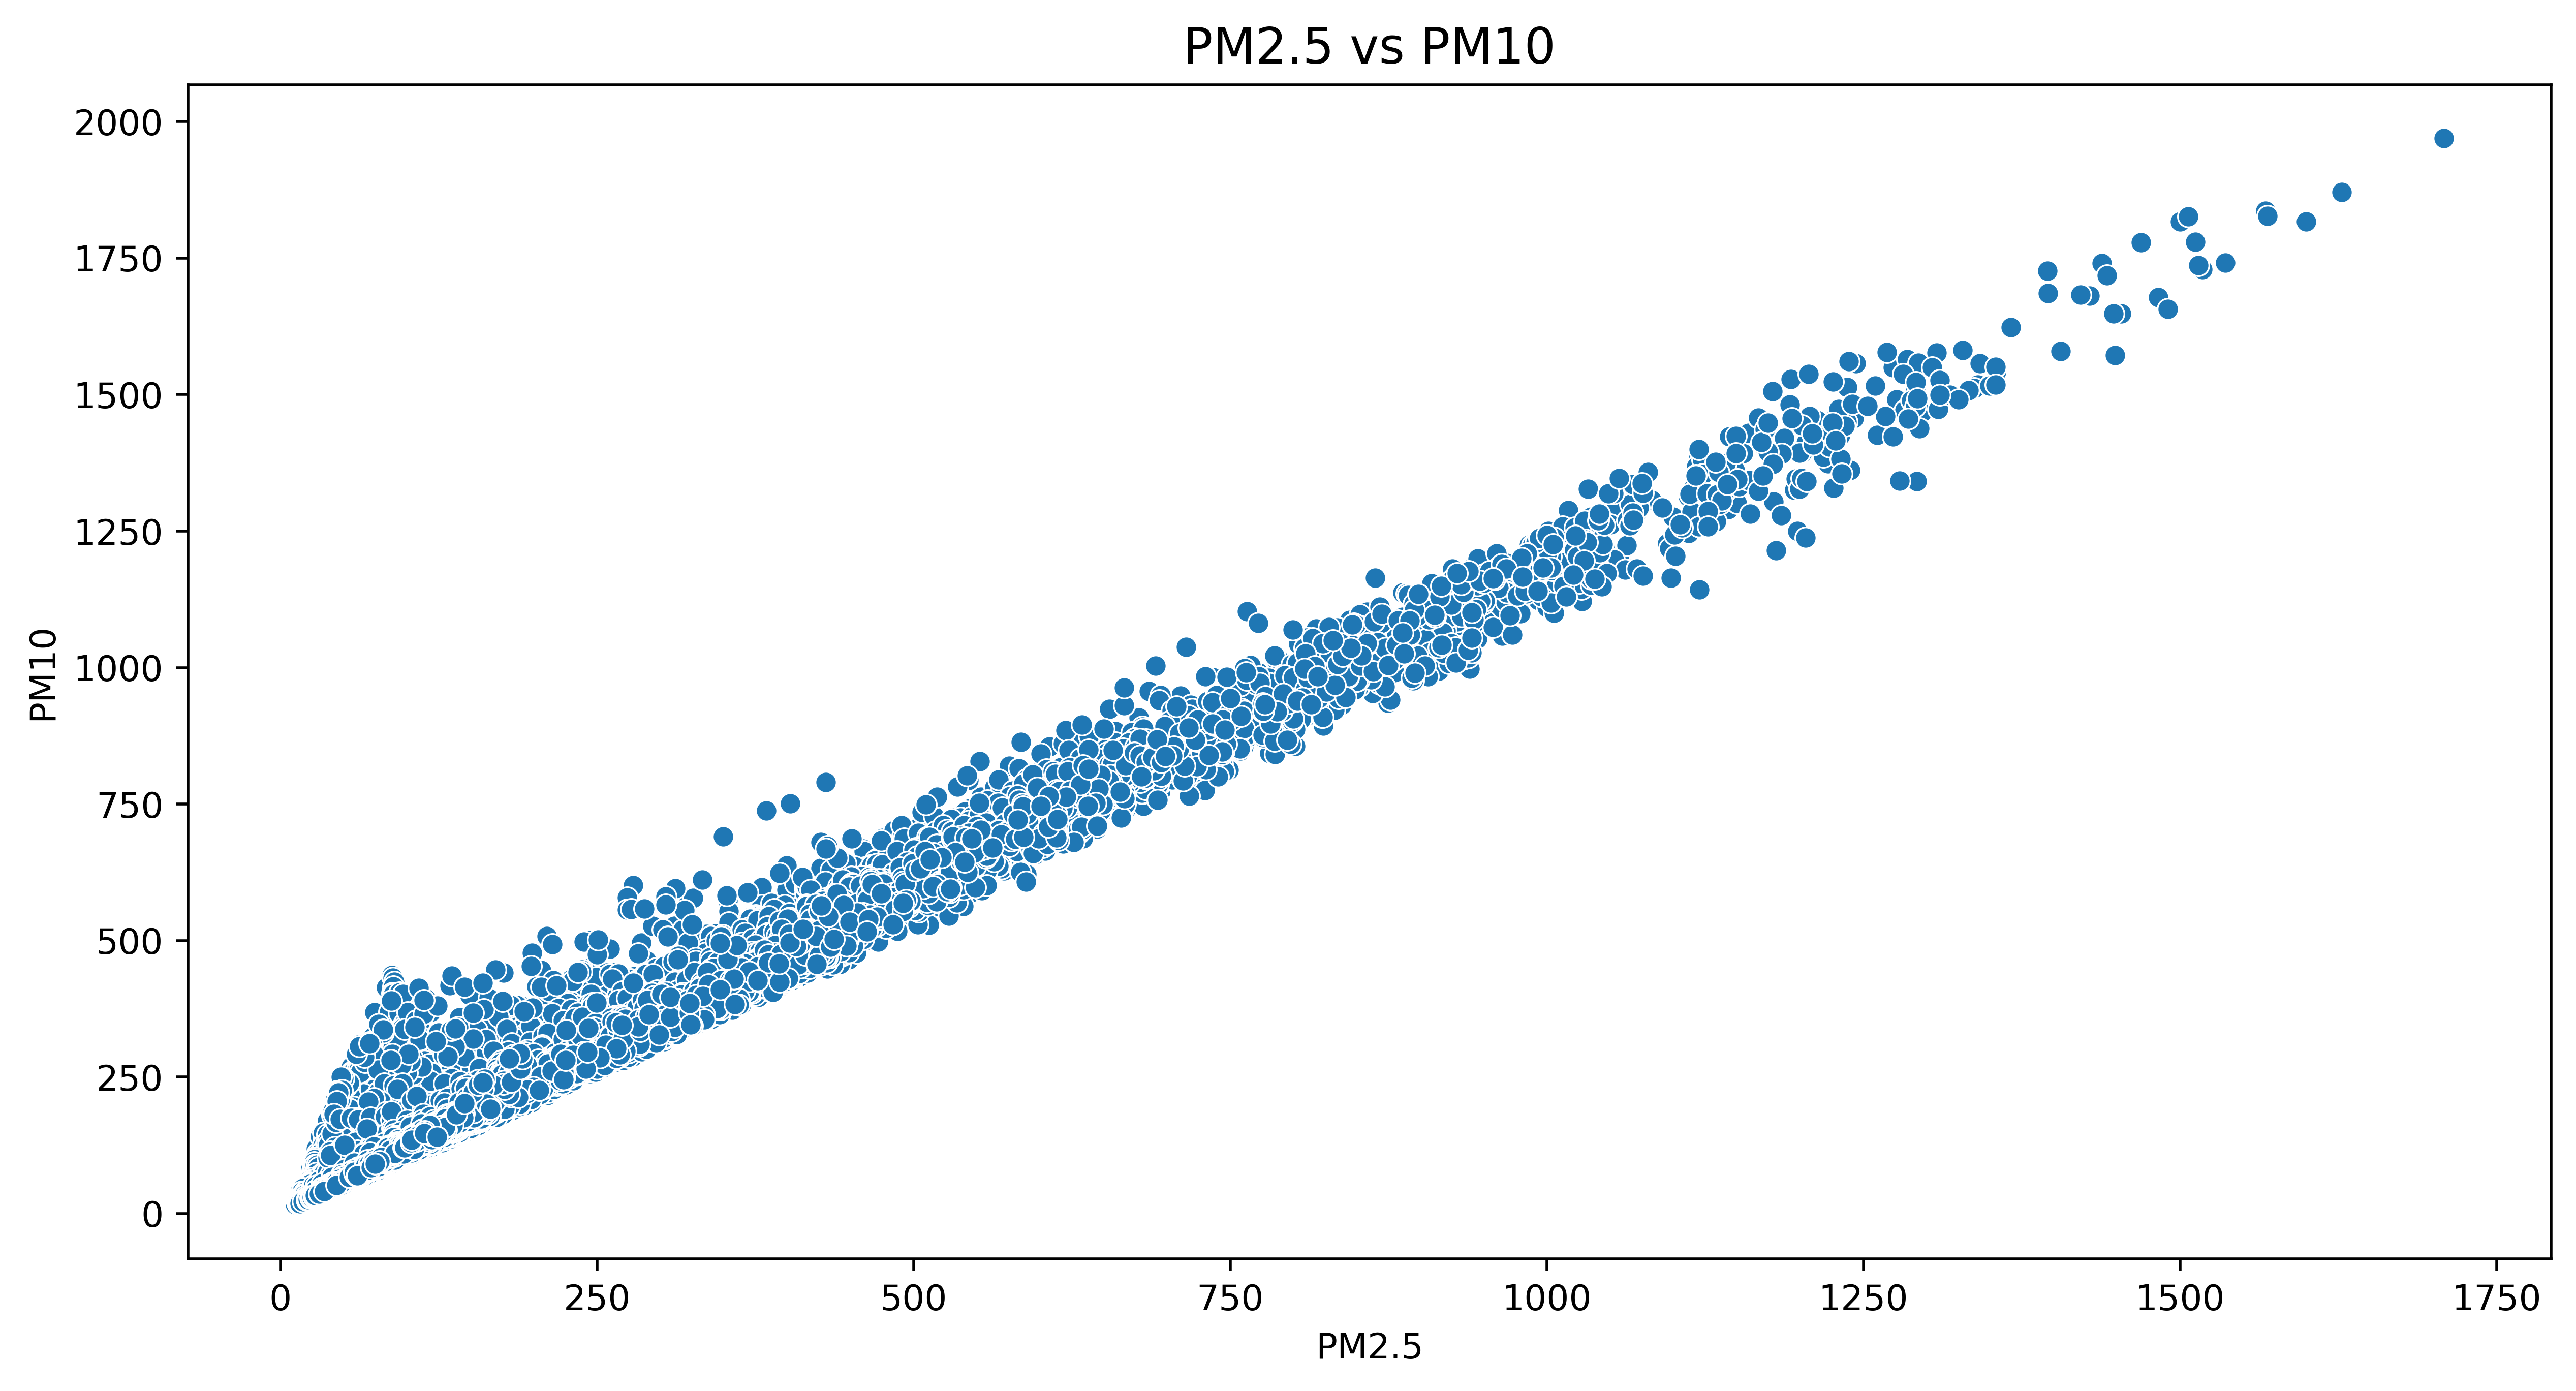

In [17]:
plt.figure(figsize=(12,6),dpi=500)

sns.scatterplot(x='pm2_5',y='pm10',data=df,palette='Set1')
plt.title('PM2.5 vs PM10',fontsize=14)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()

# Boxplot to Detect Outliers in PM2.5

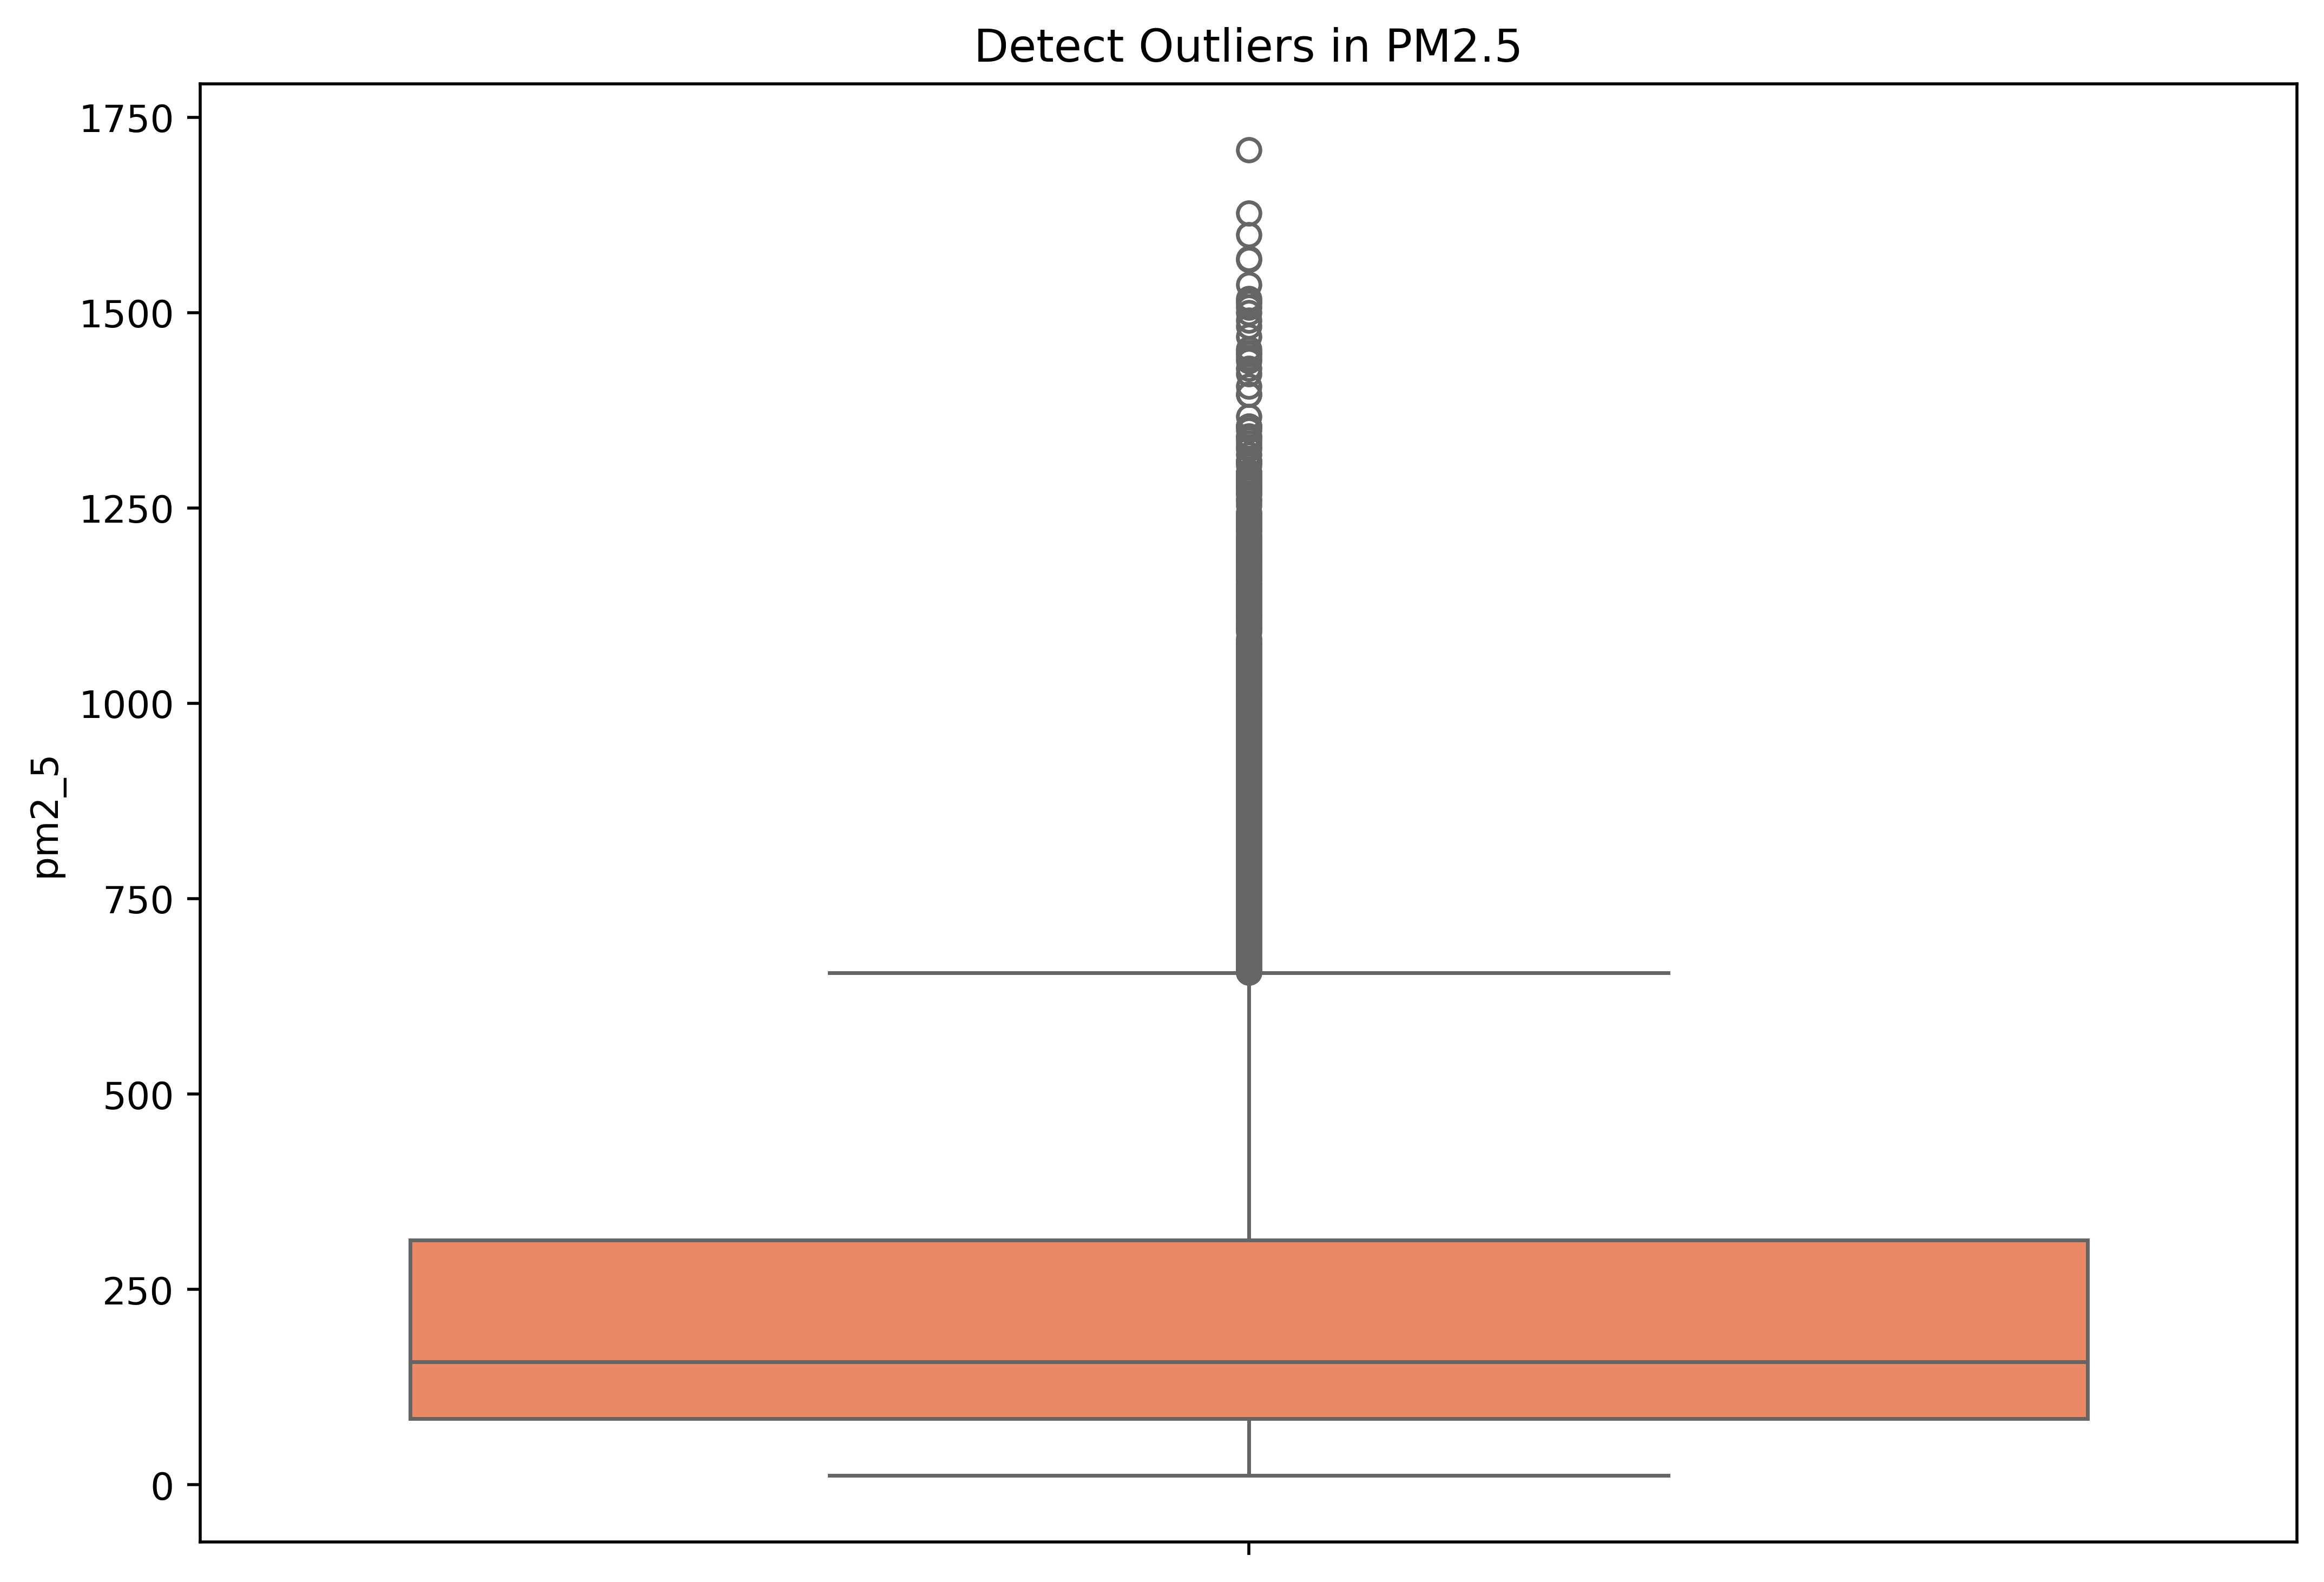

In [18]:
plt.figure(figsize=(10,7),dpi=500)

sns.boxplot(data=df['pm2_5'],color='coral')
plt.title('Detect Outliers in PM2.5')
plt.show()

# Average Pollutant Levels

In [19]:
pollutant_cols = ['co','no','no2','o3','so2','pm2_5','pm10','nh3'] 
pollutant_cols

['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

In [20]:
a = df[pollutant_cols].mean().sort_values(ascending=False)
a

co       2929.228628
pm10      300.092966
pm2_5     238.130309
so2        66.693633
no2        66.221299
o3         60.346239
no         33.660702
nh3        25.109815
dtype: float64

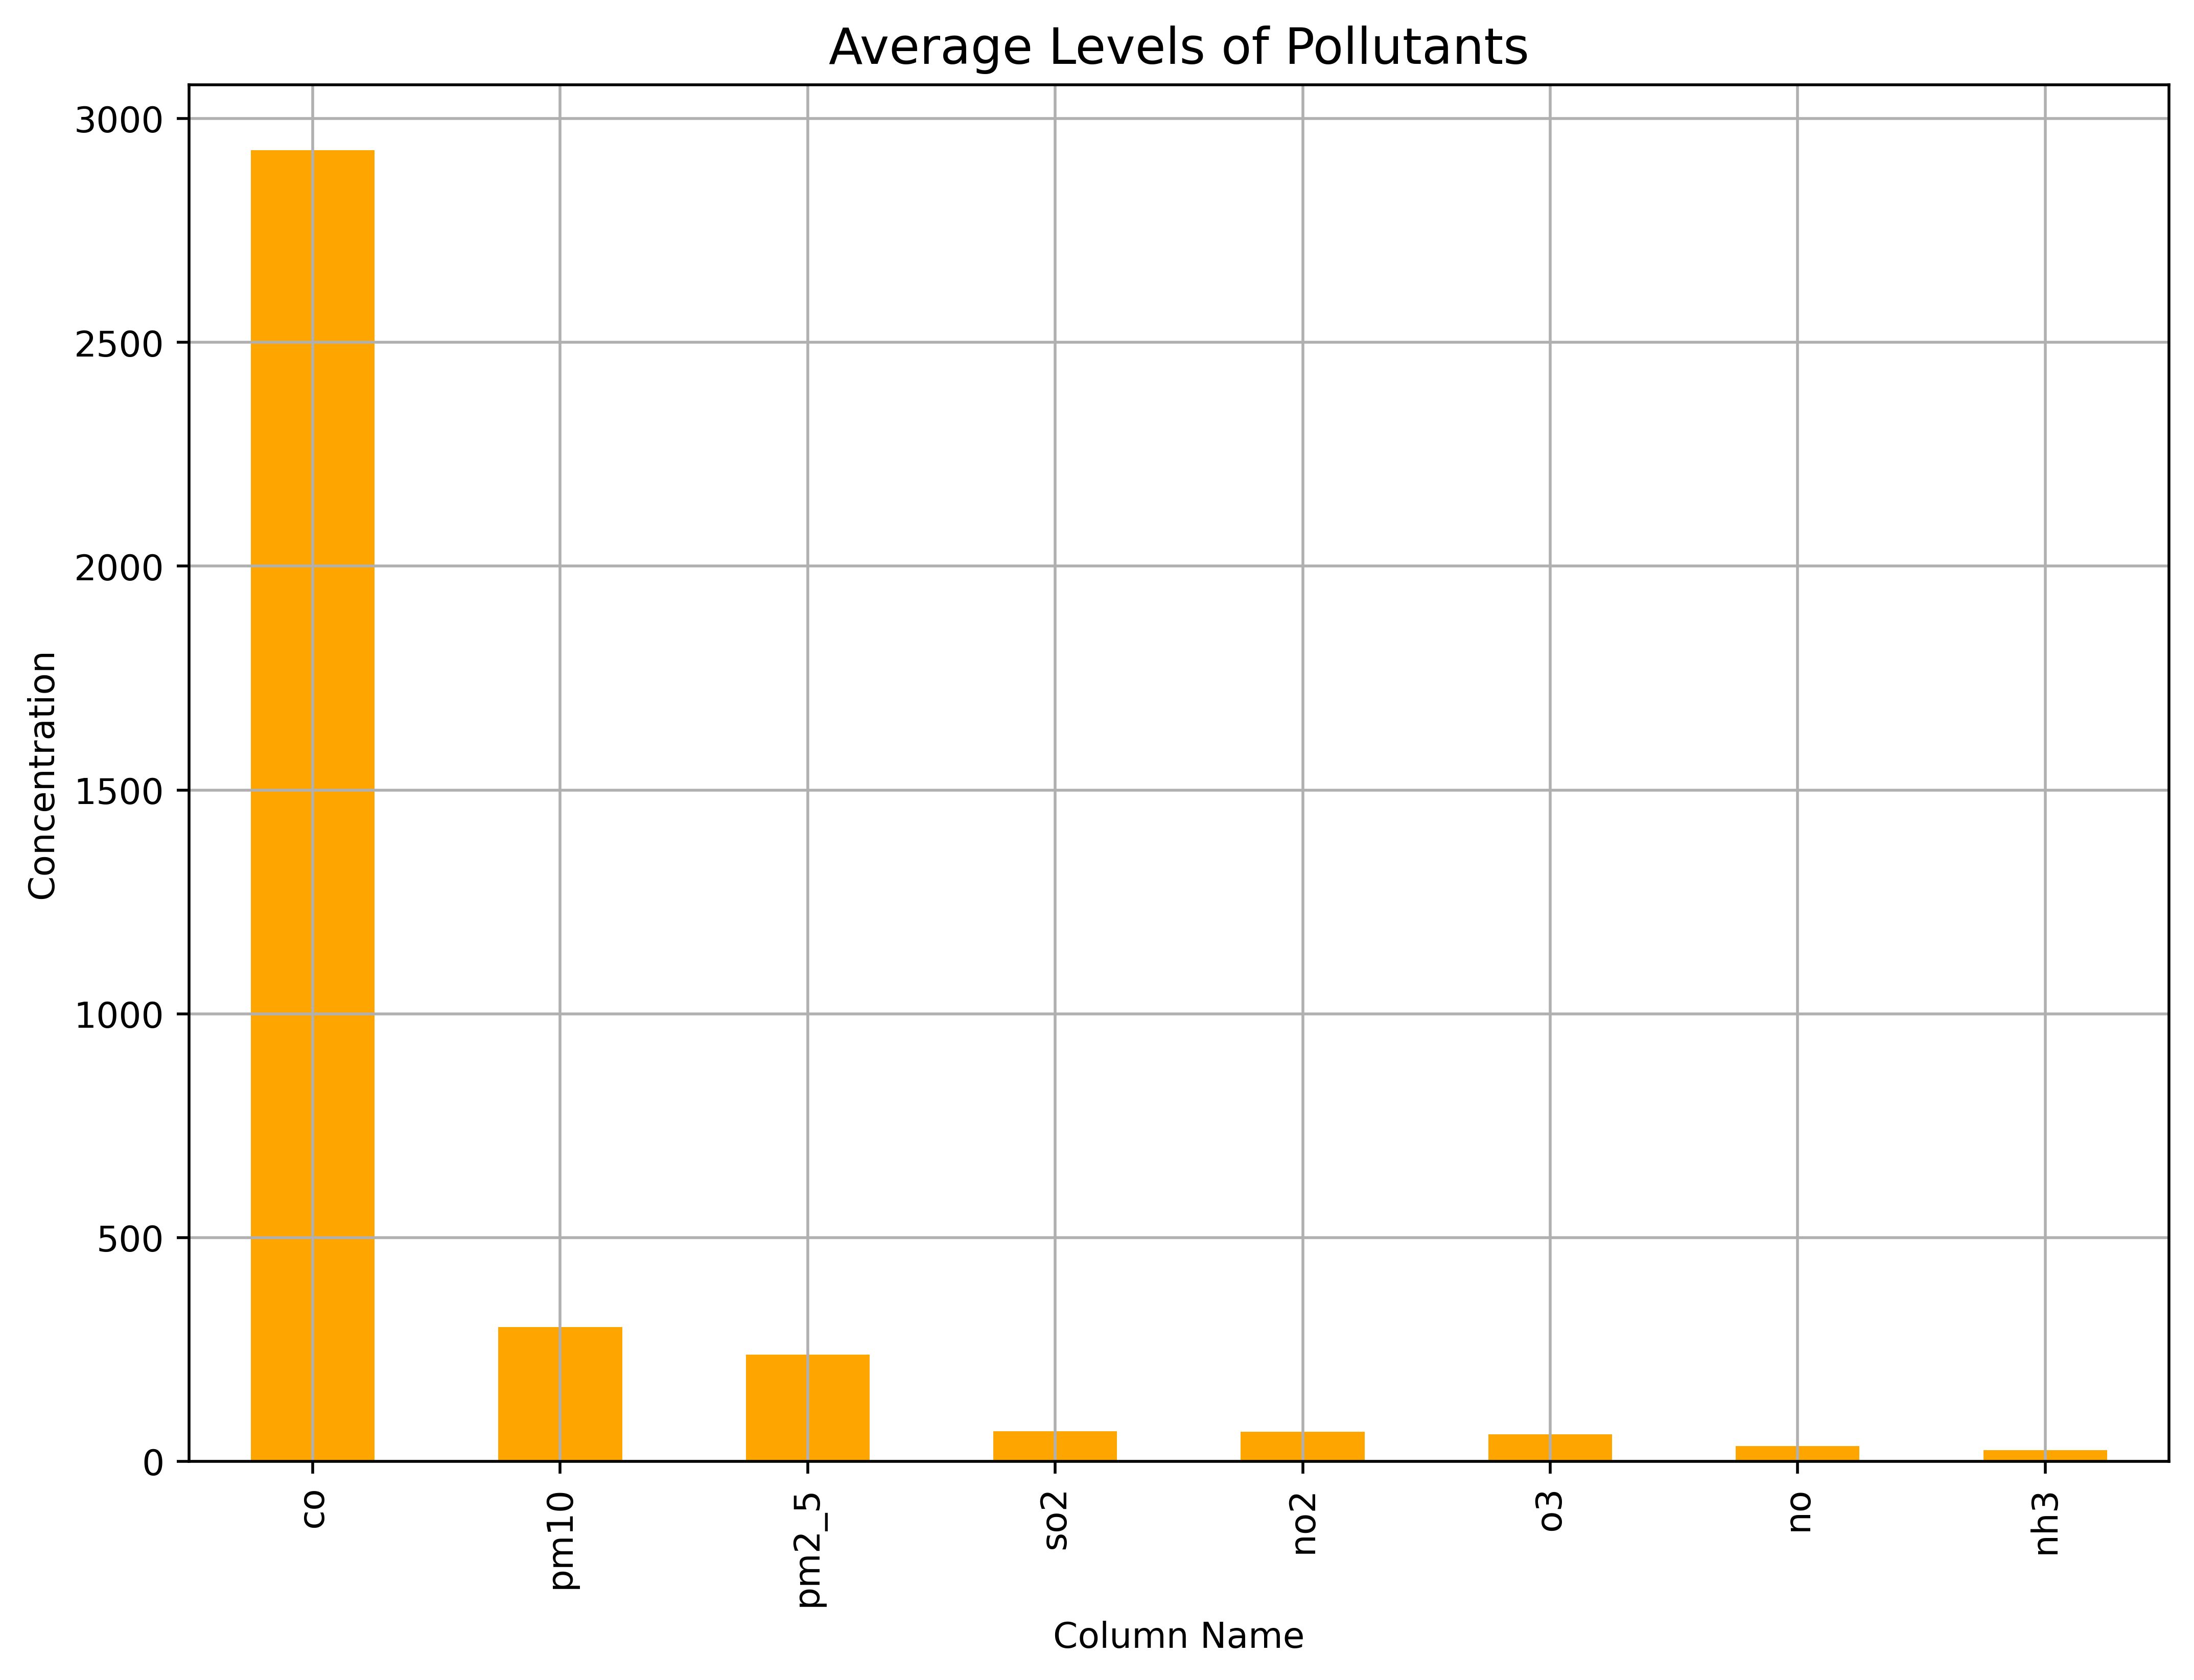

In [21]:
plt.figure(figsize=(10,7),dpi=500)

a.plot(kind='bar',color='orange')
plt.title('Average Levels of Pollutants',fontsize=14)
plt.xlabel('Column Name')
plt.ylabel('Concentration')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Which month has the highest average PM2.5?

In [22]:
top_month = df.groupby(['Month'])['pm2_5'].mean().sort_values(ascending=False).head(1)
top_month

Month
2    420.916735
Name: pm2_5, dtype: float64

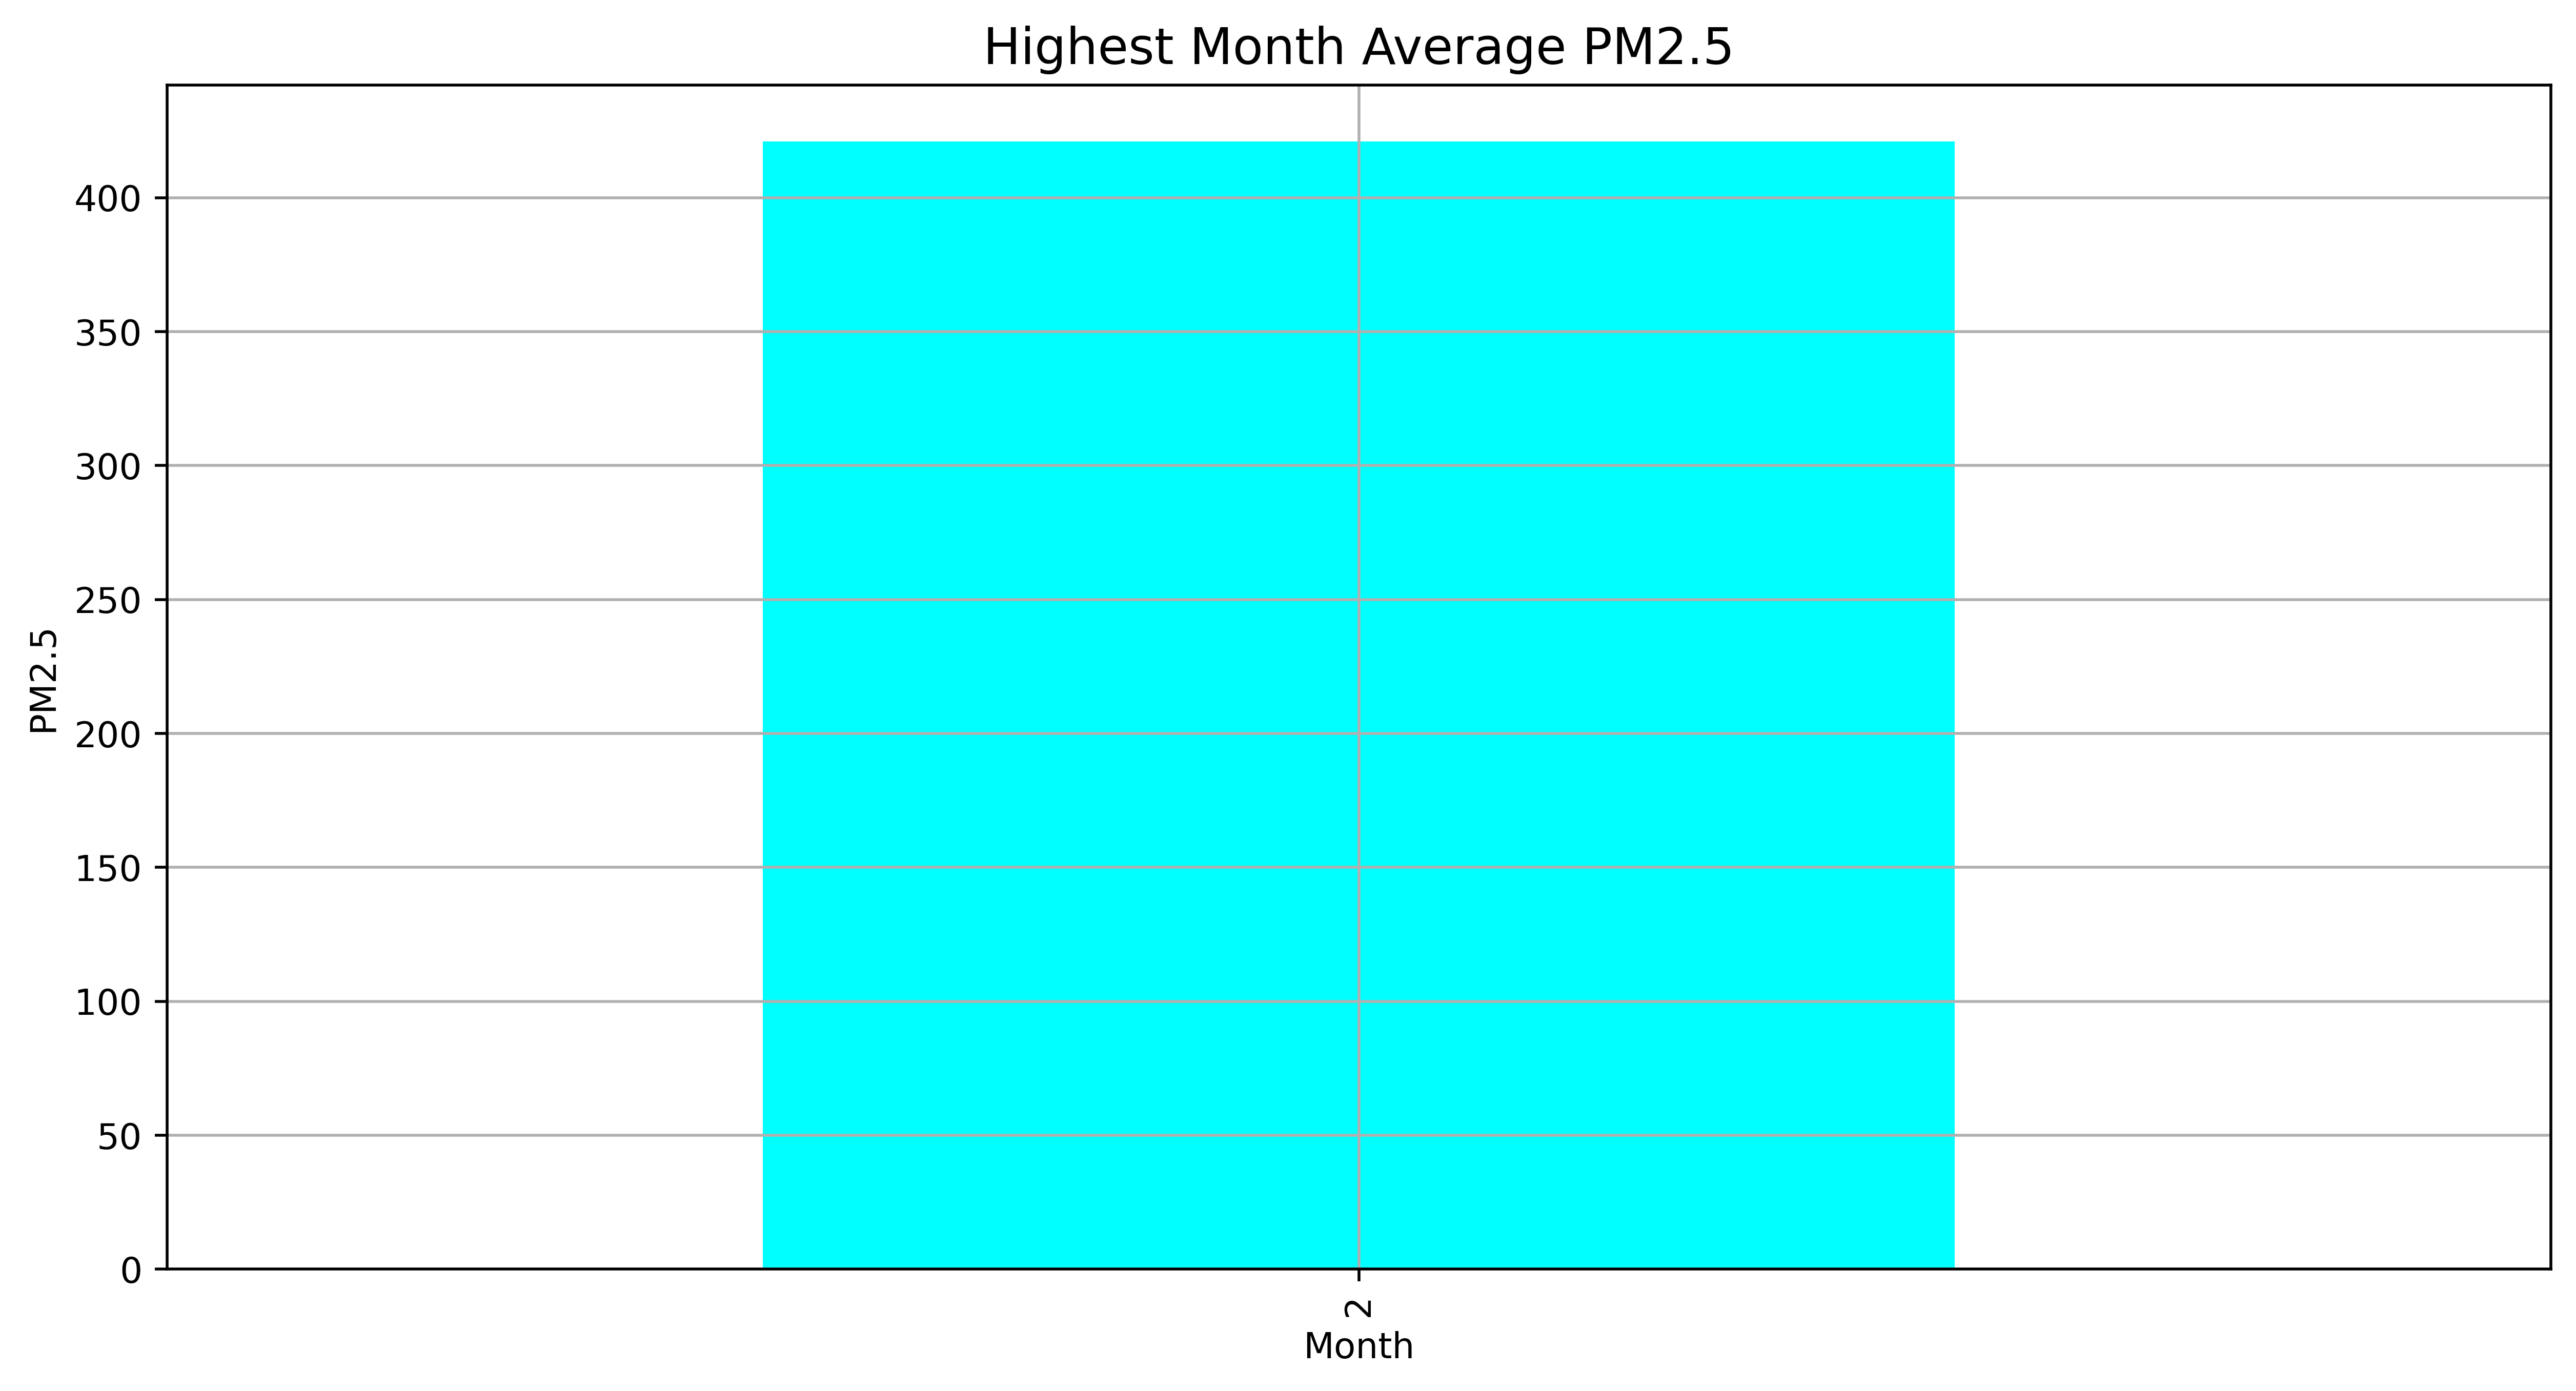

In [23]:
plt.figure(figsize=(12,6),dpi=500)

top_month.plot(kind='bar',color='cyan')
plt.title('Highest Month Average PM2.5',fontsize=14)
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# How many days had PM2.5 above 200 (very unhealthy)?

In [24]:
high_pm25_days = df[df['pm2_5']>200]
high_pm25_days

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Month
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,11
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,11
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,11
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,11
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,11
...,...,...,...,...,...,...,...,...,...,...
18769,2023-01-24 02:00:00,2162.93,8.61,45.24,0.89,21.94,291.08,365.18,7.16,1
18770,2023-01-24 03:00:00,2136.23,8.16,43.87,4.74,23.37,269.92,344.91,6.90,1
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,1
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,1


In [25]:
len(high_pm25_days)

7606

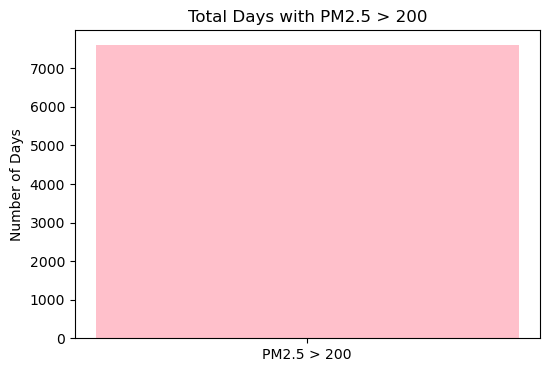

In [26]:
plt.figure(figsize=(6,4))
plt.bar(['PM2.5 > 200'], [len(high_pm25_days)], color='pink')
plt.title("Total Days with PM2.5 > 200")
plt.ylabel("Number of Days")
plt.show()

In [27]:
# plt.figure(figsize=(12,6),dpi=500)

# high_pm25_days.plot(kind='bar',color='magenta')
# # plt.title('Days PM2.5 above 200',fontsize=14)
# # plt.ylabel('PM2.5')
# # plt.xticks(rotation=90)
# # plt.grid(True)
# # plt.show()

# Daily change in PM2.5 (first difference)


In [28]:
df['pm2.5_diff'] = df['pm2_5'].diff()
df[['date','pm2.5_diff']].head()

,date,pm2.5_diff
0,2020-11-25 01:00:00,NaN
1,2020-11-25 02:00:00,56.35
2,2020-11-25 03:00:00,42.72
3,2020-11-25 04:00:00,-8.87
4,2020-11-25 05:00:00,-6.67


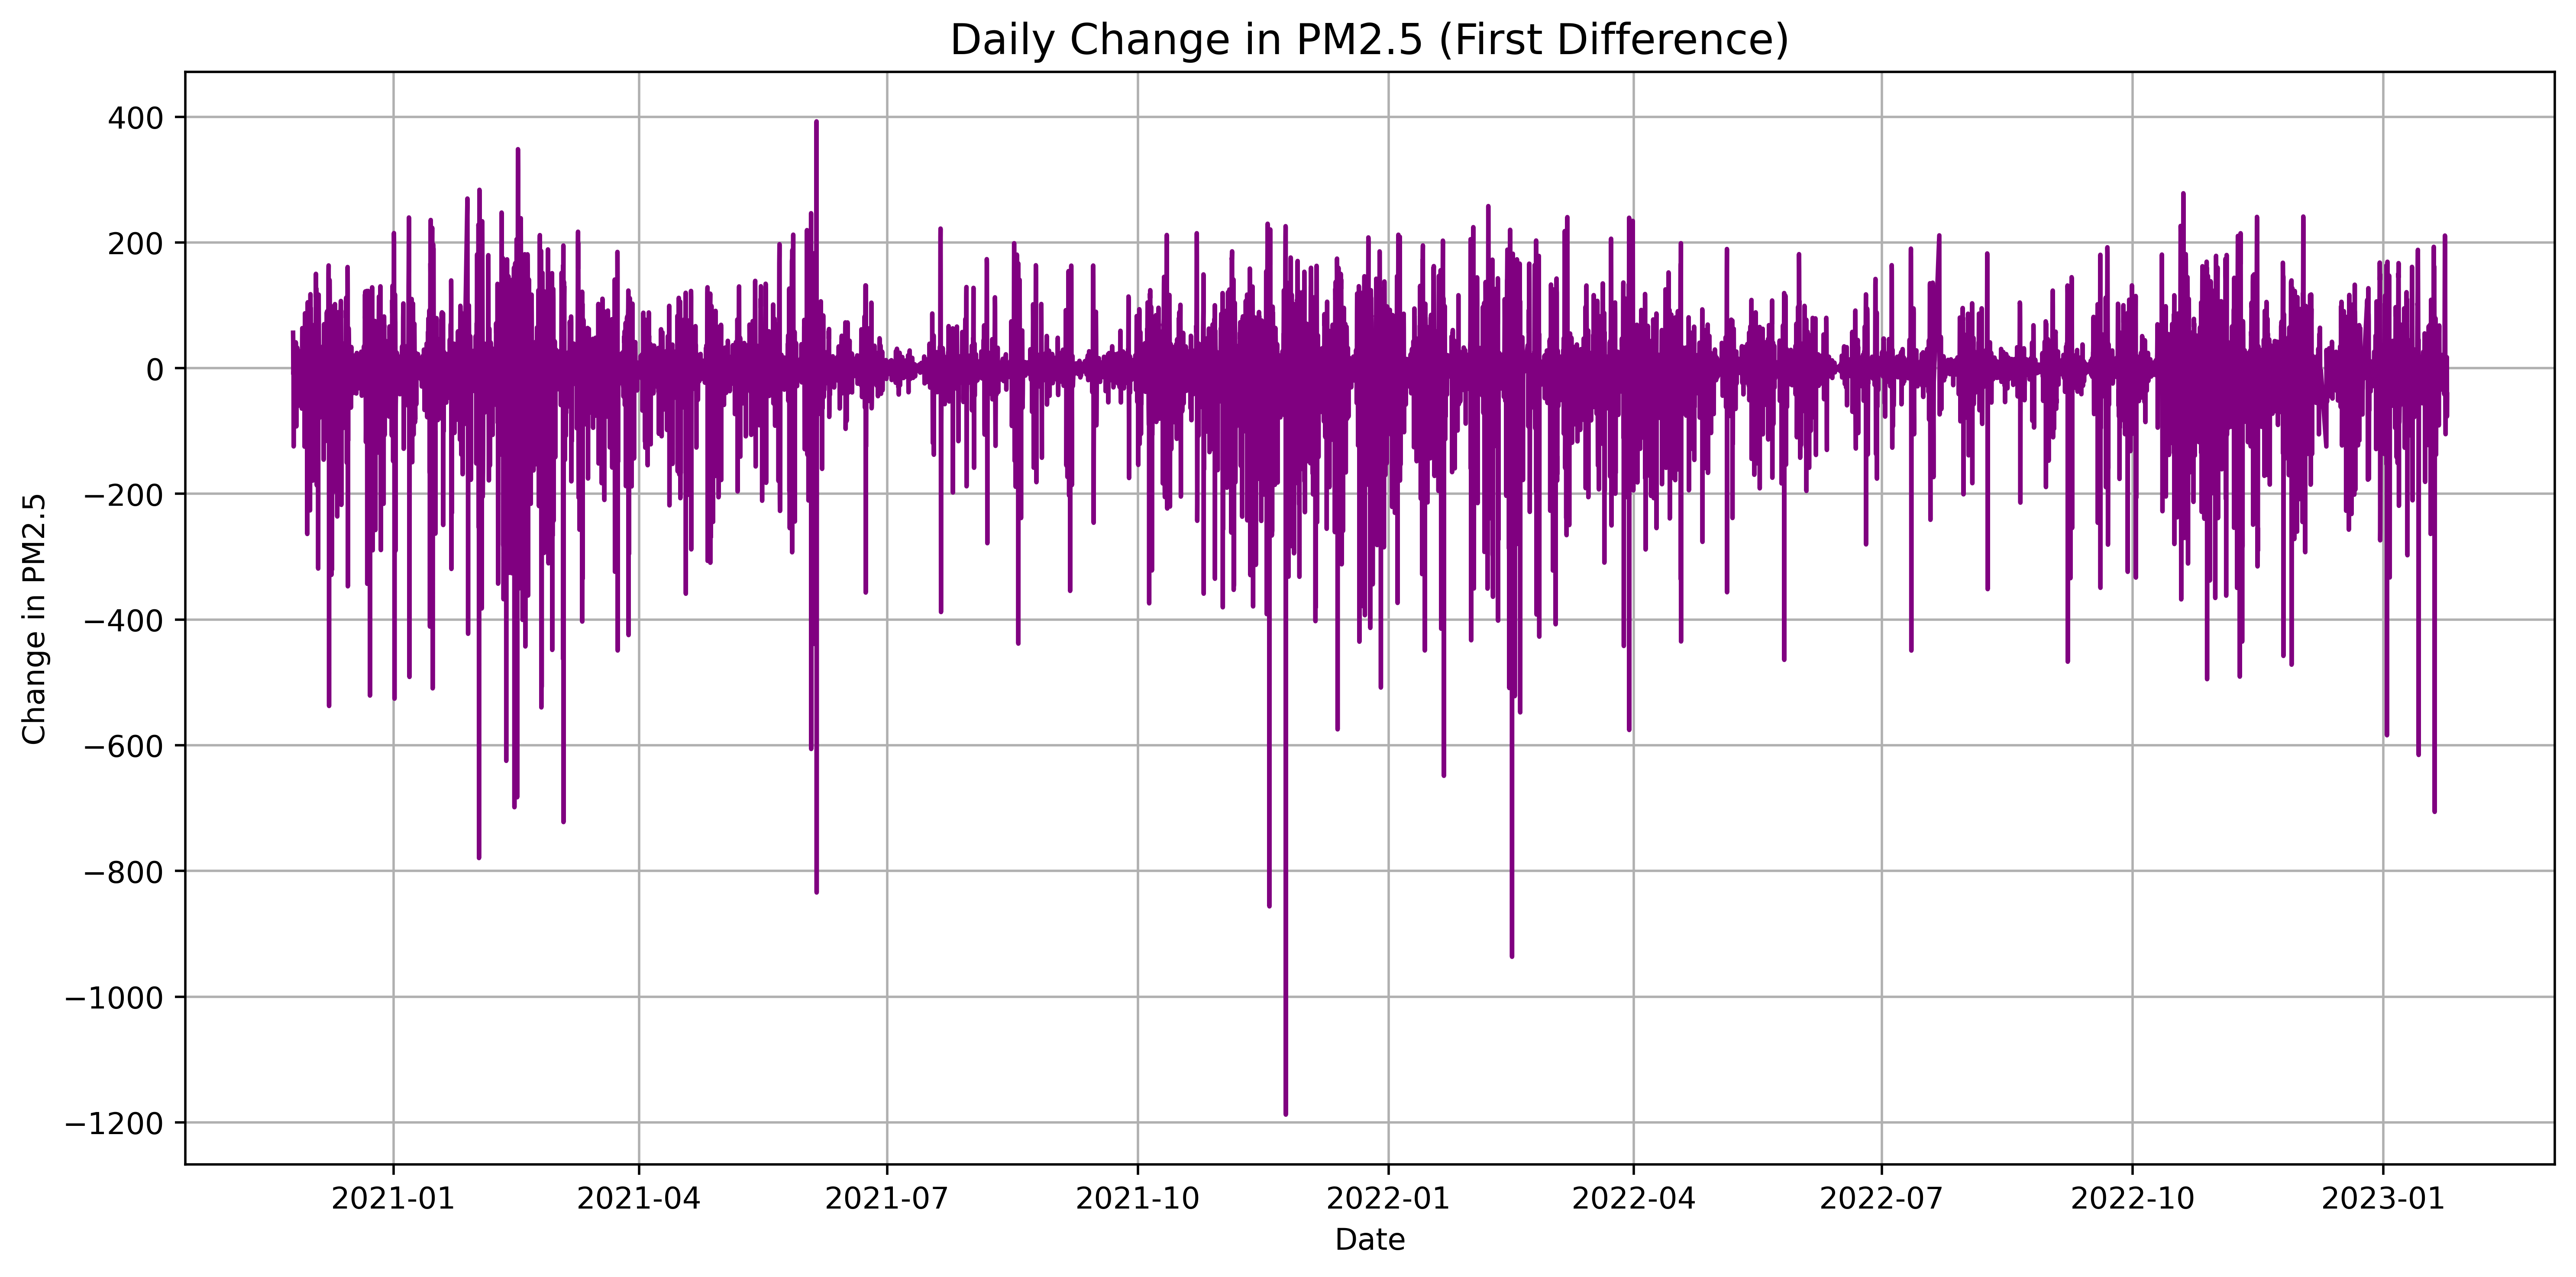

In [29]:
plt.figure(figsize=(12,6),dpi=500)

plt.plot(df['date'],df['pm2.5_diff'],color='purple')
plt.title("Daily Change in PM2.5 (First Difference)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Change in PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()

# Which pollutant has the highest average concentration?

In [30]:
pollutants = ['co','no','no2','o3','so2','pm2_5','pm10','nh3']
a = df[pollutants].mean().sort_values(ascending=False)
a

co       2929.228628
pm10      300.092966
pm2_5     238.130309
so2        66.693633
no2        66.221299
o3         60.346239
no         33.660702
nh3        25.109815
dtype: float64

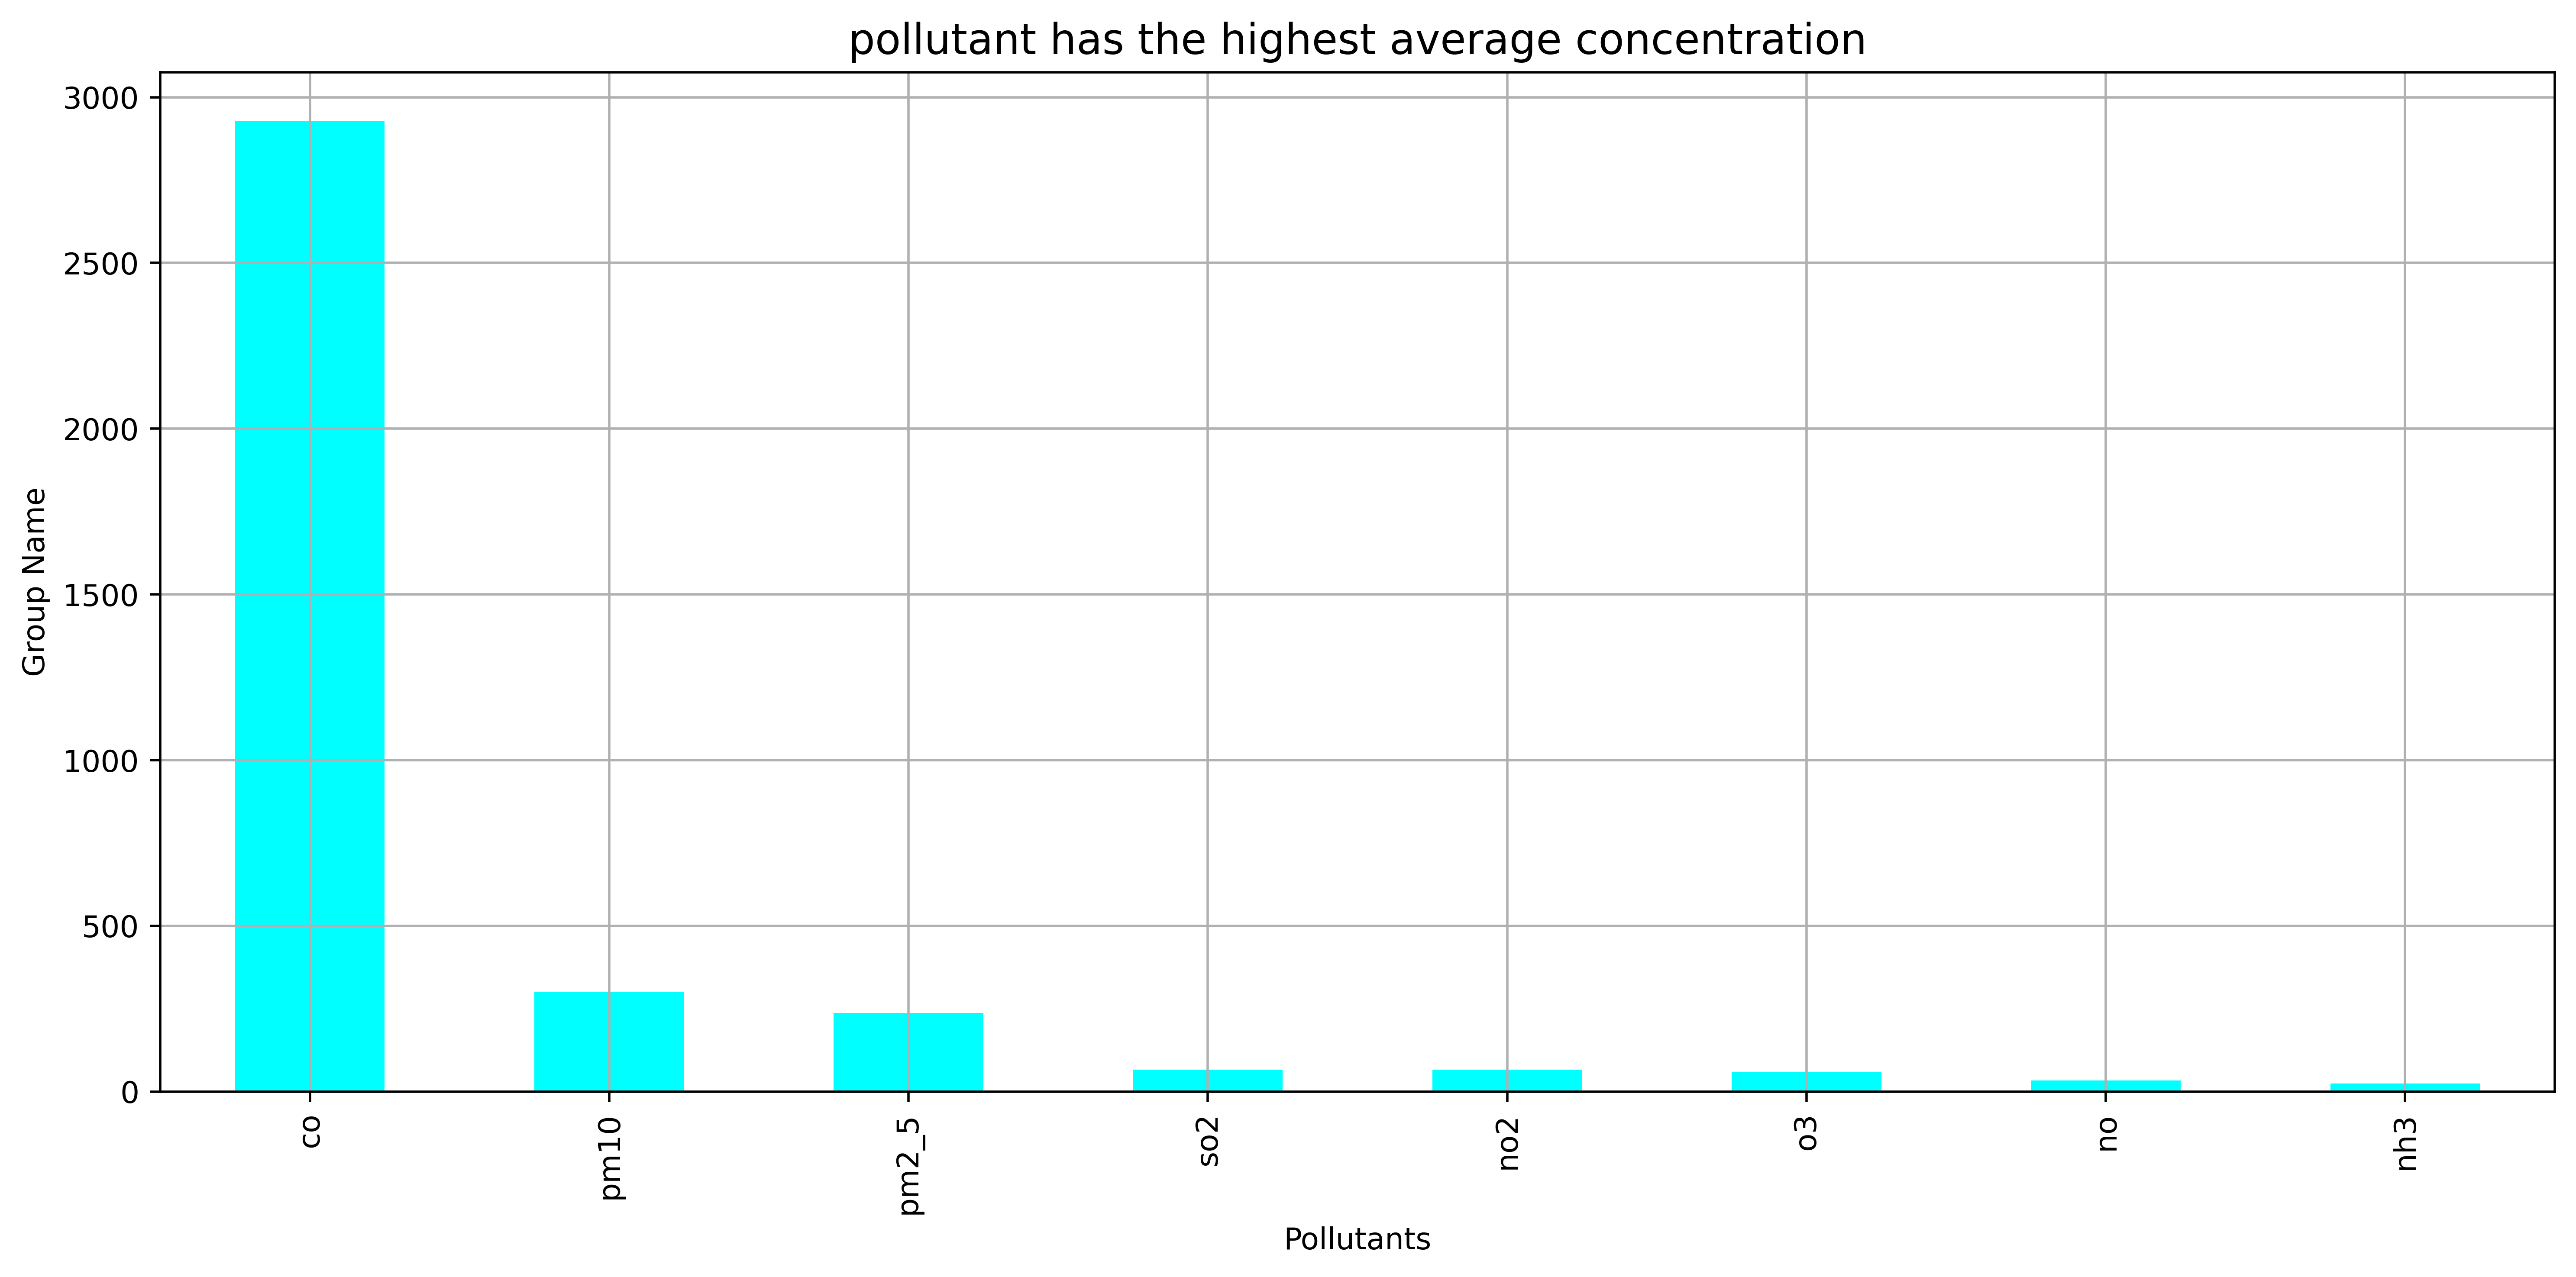

In [31]:
plt.figure(figsize=(12,6),dpi=500)

a.plot(kind='bar',color='cyan')
plt.title("pollutant has the highest average concentration", fontsize=14)
plt.xlabel("Pollutants")
plt.ylabel("Group Name")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram of PM2.5 levels

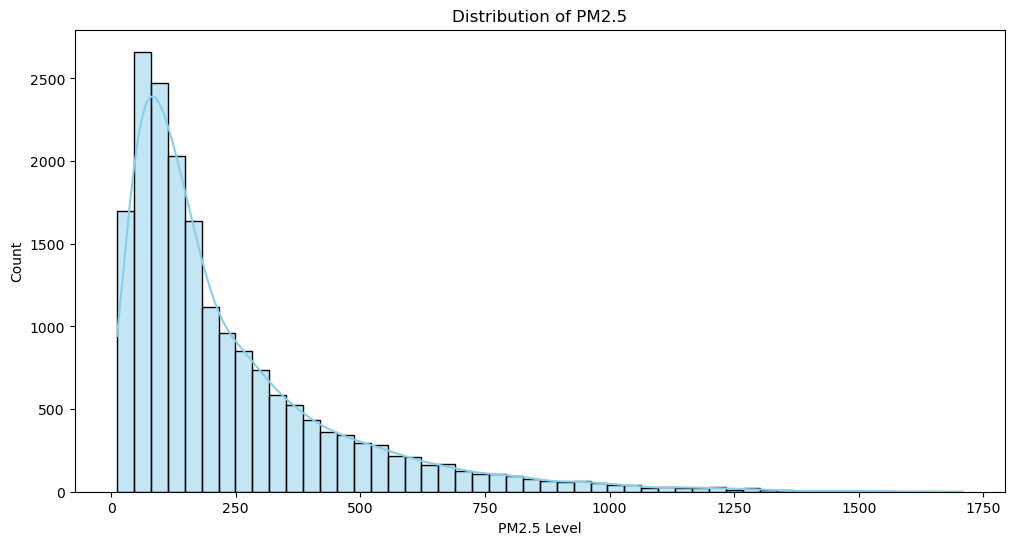

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df['pm2_5'],bins=50,kde=True,color='skyblue')
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 Level")
plt.show()

# Pollution levels during winter vs summer

In [33]:
df['season'] = df['Month'].apply(lambda a:'winter' if a in [11,12,1,2] else 'summer')

In [34]:
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Month,pm2.5_diff,season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,11,NaN,winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,11,56.35,winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,11,42.72,winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,11,-8.87,winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,11,-6.67,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,1,-38.77,winter
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,1,-6.07,winter
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,1,17.41,winter
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,1,-76.82,winter


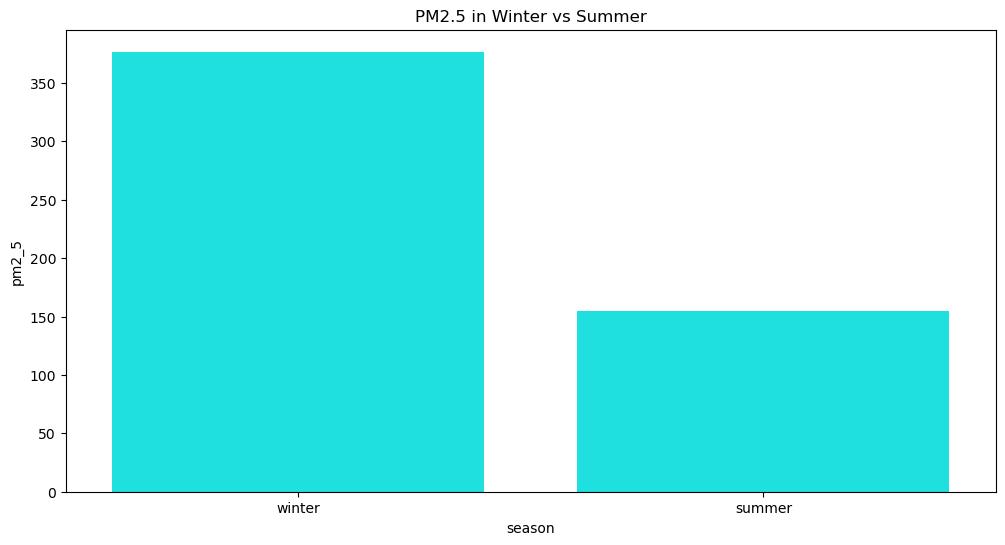

In [35]:
plt.figure(figsize=(12,6))

sns.barplot(x='season',y='pm2_5',data=df,color='cyan',ci=None)
plt.title("PM2.5 in Winter vs Summer")
plt.show()